In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
import datetime
import operator
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
# Gathering Data
# Confirmed Cases
confirmed_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
confirmed_cases.head()

# Deaths Reported
deaths_reported = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
deaths_reported.head()

# Recovered Cases
recovered_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

# Latest Data
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/08-19-2021.csv')

In [3]:
# Fetching all the columns from confirmed dataset
cols = confirmed_cases.keys()
print(cols)

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '3/6/22', '3/7/22', '3/8/22', '3/9/22', '3/10/22', '3/11/22', '3/12/22',
       '3/13/22', '3/14/22', '3/15/22'],
      dtype='object', length=788)


In [4]:
# Extracting the data columns
confirmed = confirmed_cases.loc[:, cols[4]:cols[-1]]
deaths = deaths_reported.loc[:, cols[4]:cols[-1]]
recoveries = recovered_cases.loc[:, cols[4]:cols[-1]]

In [5]:
print(len(confirmed.keys()))

784


In [6]:
# Range of date
dates = confirmed.keys()

# Summary
world_cases = []
total_deaths = []
mortality_rate = []
recovery_rate = []
total_recovered = []
total_active = []

# Confirmed
china_cases = []
italy_cases = []
us_cases = []
spain_cases = []
france_cases = []
germany_cases = []
uk_cases = []
russia_cases = []
india_cases = []

# Deaths
china_deaths = []
italy_deaths = []
us_deaths = []
spain_deaths = []
france_deaths = []
germany_deaths = []
uk_deaths = []
russia_deaths = []
india_deaths = []

# Recovered
china_recoveries = []
italy_recoveries = []
us_recoveries = []
spain_recoveries = []
france_recoveries = []
germany_recoveries = []
uk_recoveries = []
russia_recoveries = []
india_recoveries = []

In [7]:
# Fill with the dataset
for i in dates:
    confirmed_sum = confirmed[i].sum()
    recovered_sum = recoveries[i].sum()
    death_sum = deaths[i].sum()
    
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)

    china_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='China'][i].sum())
    italy_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Italy'][i].sum())
    us_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='US'][i].sum())
    spain_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Spain'][i].sum())
    france_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='France'][i].sum())
    germany_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Germany'][i].sum())
    uk_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='United Kingdom'][i].sum())
    russia_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Russia'][i].sum())
    india_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='India'][i].sum())
    
    china_deaths.append(deaths_reported[deaths_reported['Country/Region']=='China'][i].sum())
    italy_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Italy'][i].sum())
    us_deaths.append(deaths_reported[deaths_reported['Country/Region']=='US'][i].sum())
    spain_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Spain'][i].sum())
    france_deaths.append(deaths_reported[deaths_reported['Country/Region']=='France'][i].sum())
    germany_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Germany'][i].sum())
    uk_deaths.append(deaths_reported[deaths_reported['Country/Region']=='United Kingdom'][i].sum())
    russia_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Russia'][i].sum())
    india_deaths.append(deaths_reported[deaths_reported['Country/Region']=='India'][i].sum())
  
    china_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='China'][i].sum())
    italy_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Italy'][i].sum())
    us_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='US'][i].sum())
    spain_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Spain'][i].sum())
    france_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='France'][i].sum())
    germany_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Germany'][i].sum())
    uk_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='United Kingdom'][i].sum())
    russia_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Russia'][i].sum())
    india_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='India'][i].sum())

In [8]:
# A function to get daily increase of cases
def daily_increase(data):
    d = []
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i] - data[i-1])
    
    return d

In [9]:
# confirmed cases
world_daily_increase = daily_increase(world_cases)
china_daily_increase = daily_increase(china_cases)
italy_daily_increase = daily_increase(italy_cases)
us_daily_increase = daily_increase(us_cases)
spain_daily_increase = daily_increase(spain_cases)
france_daily_increase = daily_increase(france_cases)
germany_daily_increase = daily_increase(germany_cases)
uk_daily_increase = daily_increase(uk_cases)
india_daily_increase = daily_increase(india_cases)

In [10]:
# Deaths
world_daily_death = daily_increase(total_deaths)
china_daily_death = daily_increase(china_deaths)
italy_daily_death = daily_increase(italy_deaths)
us_daily_death = daily_increase(us_deaths)
spain_daily_death = daily_increase(spain_deaths)
france_daily_death = daily_increase(france_deaths)
germany_daily_death = daily_increase(germany_deaths)
uk_daily_death = daily_increase(uk_deaths)
india_daily_death = daily_increase(india_deaths)

In [11]:
# Recoveries
world_daily_recovery = daily_increase(total_recovered)
china_daily_recovery = daily_increase(china_recoveries)
italy_daily_recovery = daily_increase(italy_recoveries)
us_daily_recovery = daily_increase(us_recoveries)
spain_daily_recovery = daily_increase(spain_recoveries)
france_daily_recovery = daily_increase(france_recoveries)
germany_daily_recovery = daily_increase(germany_recoveries)
uk_daily_recovery = daily_increase(uk_recoveries)
india_daily_recovery = daily_increase(india_recoveries)

In [12]:
# Identifying unique countries
unique_countries =  list(latest_data['Country_Region'].unique())
unique_countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',

In [13]:
confirmed_by_country = []
death_by_country = []
active_by_country = []
recovery_by_country = []
mortality_rate_by_country = []

no_cases = []
for i in unique_countries:
    cases = latest_data[latest_data["Country_Region"] == i]["Confirmed"].sum()
    if cases > 0:
        confirmed_by_country.append(cases)
    else:
        no_cases.append(i)

for i in no_cases:
    unique_countries.remove(i)

# Sort countries by the number of confirmed cases
unique_countries = [k for k, v in sorted(zip(unique_countries, confirmed_by_country), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    confirmed_by_country[i] = latest_data[latest_data['Country_Region']==unique_countries[i]]['Confirmed'].sum()
    death_by_country.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Deaths'].sum())
    recovery_by_country.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Recovered'].sum())
    active_by_country.append(confirmed_by_country[i] - death_by_country[i] - recovery_by_country[i])
    mortality_rate_by_country.append(death_by_country[i]/confirmed_by_country[i])

In [14]:
# number of cases per country
country_df = pd.DataFrame({'Country Name': unique_countries, 'Number of Confirmed Cases': confirmed_by_country,
                          'Number of Deaths': death_by_country, 'Number of Recoveries' : recovery_by_country, 
                          'Number of Active Cases' : active_by_country,
                          'Mortality Rate': mortality_rate_by_country})

country_df.style.background_gradient(cmap='Blues')

,Country Name,Number of Confirmed Cases,Number of Deaths,Number of Recoveries,Number of Active Cases,Mortality Rate
0,US,37504199,626380,0.000000,36877819.000000,0.016702
1,India,32358829,433589,0.000000,31925240.000000,0.013399
2,Brazil,20501738,572968,0.000000,19928770.000000,0.027947
3,France,6637417,113451,0.000000,6523966.000000,0.017093
4,Russia,6592705,170716,0.000000,6421989.000000,0.025895
5,United Kingdom,6422475,131690,0.000000,6290785.000000,0.020505
6,Turkey,6157772,53891,0.000000,6103881.000000,0.008752
7,Argentina,5116803,109841,0.000000,5006962.000000,0.021467
8,Colombia,4880516,123901,0.000000,4756615.000000,0.025387
9,Spain,4758003,83004,0.000000,4674999.000000,0.017445


In [15]:
# number of cases per region
unique_provinces =  list(latest_data['Province_State'].unique())
unique_provinces

[nan,
 'Australian Capital Territory',
 'New South Wales',
 'Northern Territory',
 'Queensland',
 'South Australia',
 'Tasmania',
 'Victoria',
 'Western Australia',
 'Antwerp',
 'Brussels',
 'East Flanders',
 'Flemish Brabant',
 'Hainaut',
 'Liege',
 'Limburg',
 'Luxembourg',
 'Namur',
 'Unknown',
 'Walloon Brabant',
 'West Flanders',
 'Acre',
 'Alagoas',
 'Amapa',
 'Amazonas',
 'Bahia',
 'Ceara',
 'Distrito Federal',
 'Espirito Santo',
 'Goias',
 'Maranhao',
 'Mato Grosso',
 'Mato Grosso do Sul',
 'Minas Gerais',
 'Para',
 'Paraiba',
 'Parana',
 'Pernambuco',
 'Piaui',
 'Rio Grande do Norte',
 'Rio Grande do Sul',
 'Rio de Janeiro',
 'Rondonia',
 'Roraima',
 'Santa Catarina',
 'Sao Paulo',
 'Sergipe',
 'Tocantins',
 'Alberta',
 'British Columbia',
 'Diamond Princess',
 'Grand Princess',
 'Manitoba',
 'New Brunswick',
 'Newfoundland and Labrador',
 'Northwest Territories',
 'Nova Scotia',
 'Nunavut',
 'Ontario',
 'Prince Edward Island',
 'Quebec',
 'Repatriated Travellers',
 'Saskatche

In [16]:
confirmed_by_province = []
country_by_province = [] 
death_by_province = [] 
recovery_by_province = []
mortality_rate_by_province = [] 

no_cases = [] 
for i in unique_provinces:
    cases = latest_data[latest_data['Province_State']==i]['Confirmed'].sum()
    if cases > 0:
        confirmed_by_province.append(cases)
    else:
        no_cases.append(i)
 
# remove areas with no confirmed cases
for i in no_cases:
    unique_provinces.remove(i)
    
unique_provinces = [k for k, v in sorted(zip(unique_provinces, confirmed_by_province), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_provinces)):
    confirmed_by_province[i] = latest_data[latest_data['Province_State']==unique_provinces[i]]['Confirmed'].sum()
    country_by_province.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Country_Region'].unique()[0])
    death_by_province.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Deaths'].sum())
    recovery_by_province.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Recovered'].sum())
    mortality_rate_by_province.append(death_by_province[i]/confirmed_by_province[i])

In [17]:
# number of cases per province/state/city
province_df = pd.DataFrame({'Province/State Name': unique_provinces, 'Country': country_by_province, 'Number of Confirmed Cases': confirmed_by_province,
                          'Number of Deaths': death_by_province, 'Number of Recoveries' : recovery_by_province,
                          'Mortality Rate': mortality_rate_by_province})
# number of cases per country/region

province_df.style.background_gradient(cmap='Reds')

,Province/State Name,Country,Number of Confirmed Cases,Number of Deaths,Number of Recoveries,Mortality Rate
0,Maharashtra,India,6411570,135567,0.000000,0.021144
1,England,United Kingdom,5579087,115390,0.000000,0.020683
2,California,US,4286095,64562,0.000000,0.015063
3,Sao Paulo,Brazil,4195466,143752,0.000000,0.034264
4,Kerala,India,3766573,19246,0.000000,0.005110
5,Texas,US,3441140,54863,0.000000,0.015943
6,Florida,US,2994019,41937,0.000000,0.014007
7,Karnataka,India,2934624,37088,0.000000,0.012638
8,Tamil Nadu,India,2595935,34639,0.000000,0.013344
9,New York,US,2223052,53959,0.000000,0.024272


In [18]:
# Dealing with missing values
nan_indices = [] 

# handle nan if there is any, it is usually a float: float('nan')
for i in range(len(unique_provinces)):
    if type(unique_provinces[i]) == float:
        nan_indices.append(i)

unique_provinces = list(unique_provinces)
confirmed_by_province = list(confirmed_by_province)

for i in nan_indices:
    unique_provinces.pop(i)
    confirmed_by_province.pop(i)

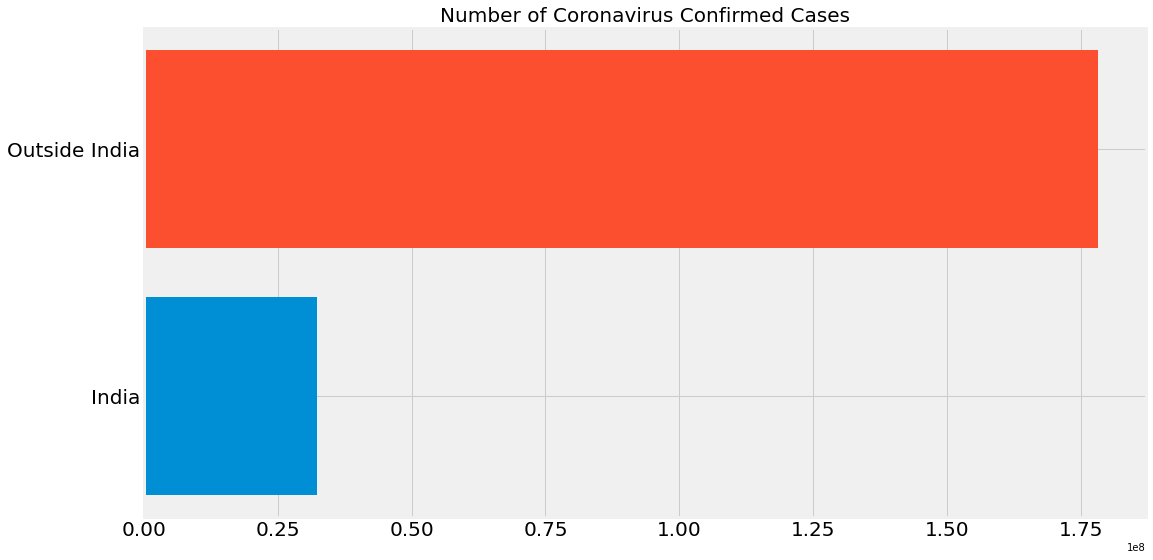

In [19]:
India_confirmed = latest_data[latest_data['Country_Region']=='India']['Confirmed'].sum()
outside_India_confirmed = np.sum(confirmed_by_country) - India_confirmed
plt.figure(figsize=(16, 9))
plt.barh('India', India_confirmed)
plt.barh('Outside India', outside_India_confirmed)
plt.title('Number of Coronavirus Confirmed Cases', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [20]:
print('Outside India: {} cases'.format(outside_India_confirmed))
print('India: {} cases'.format(India_confirmed))
print('Total: {} cases'.format(India_confirmed + outside_India_confirmed))

Outside India: 178246959 cases
India: 32358829 cases
Total: 210605788 cases


In [21]:
# Only show 10 countries with the most confirmed cases, the rest are grouped into the other category
visual_unique_countries = [] 
visual_confirmed_cases = []
others = np.sum(confirmed_by_country[10:])

for i in range(len(confirmed_by_country[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(confirmed_by_country[i])
    
visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

In [22]:
def plot_bar_graphs(x, y, title):
    plt.figure(figsize=(16, 9))
    plt.barh(x, y)
    plt.title(title, size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

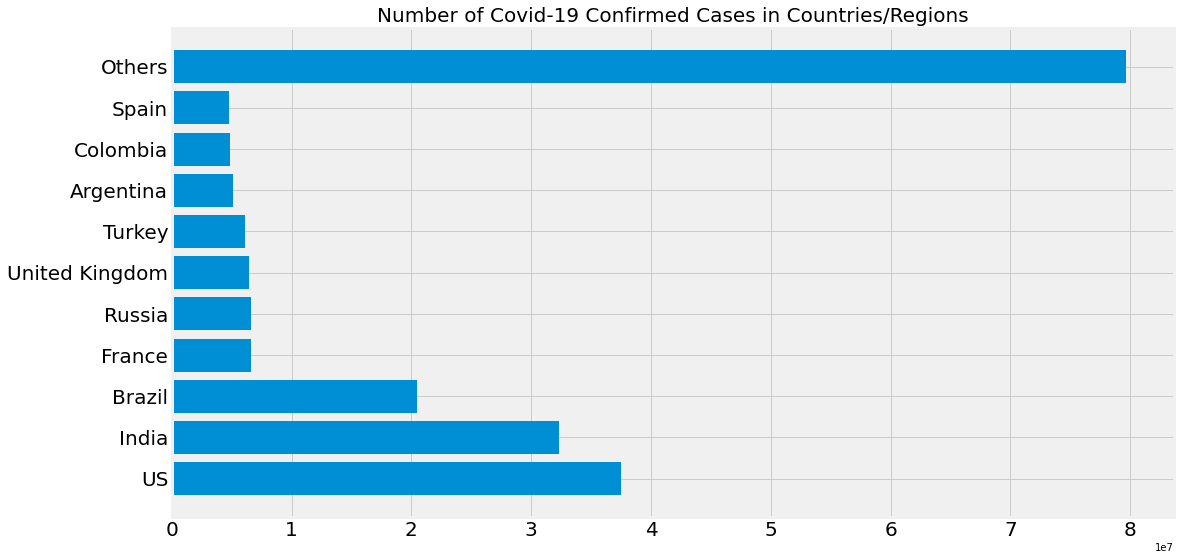

In [23]:
plot_bar_graphs(visual_unique_countries, visual_confirmed_cases, 'Number of Covid-19 Confirmed Cases in Countries/Regions')

In [24]:
def plot_pie_charts(x, y, title):
    c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
    plt.figure(figsize=(12,12))
    plt.title(title, size=20)
    plt.pie(y, colors=c)
    plt.legend(x, loc='best', fontsize=15)
    plt.show()

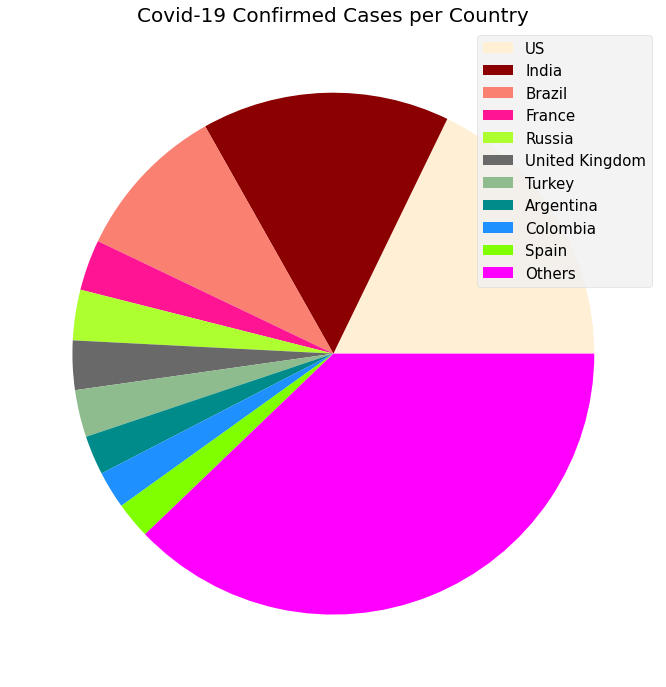

In [25]:
plot_pie_charts(visual_unique_countries, visual_confirmed_cases, 'Covid-19 Confirmed Cases per Country')

In [26]:
# Only show 10 provinces with the most confirmed cases, the rest are grouped into the others category
visual_unique_provinces = [] 
visual_confirmed_cases2 = []
others = np.sum(confirmed_by_province[10:])

for i in range(len(confirmed_by_province[:10])):
    visual_unique_provinces.append(unique_provinces[i])
    visual_confirmed_cases2.append(confirmed_by_province[i])

visual_unique_provinces.append('Others')
visual_confirmed_cases2.append(others)

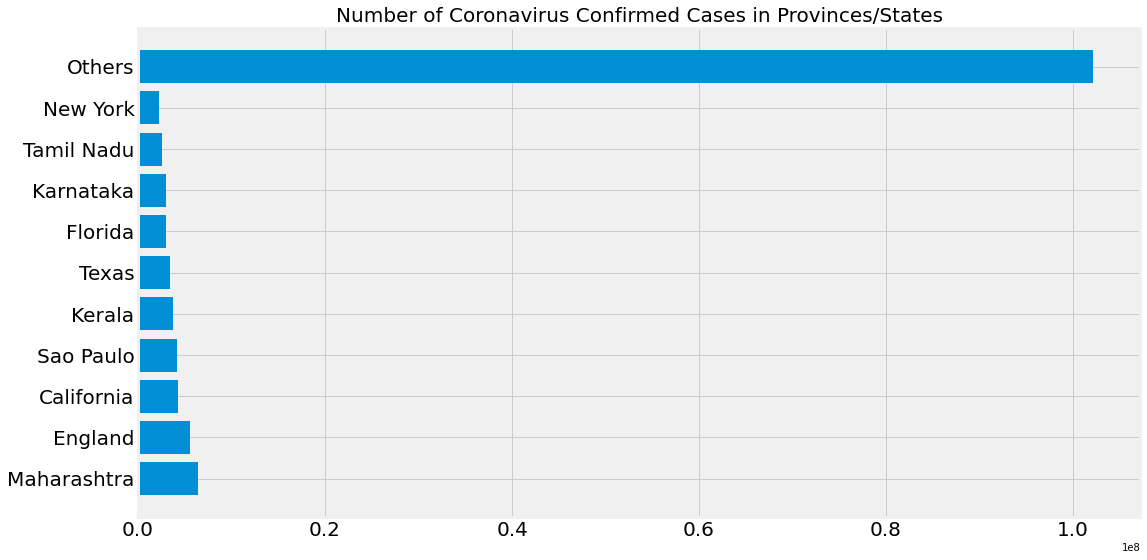

In [27]:
plot_bar_graphs(visual_unique_provinces, visual_confirmed_cases2, 'Number of Coronavirus Confirmed Cases in Provinces/States')

In [28]:
def plot_pie_country_with_regions(country_name, title):
    regions = list(latest_data[latest_data['Country_Region']==country_name]['Province_State'].unique())
    confirmed_cases = []
    no_cases = [] 

    for i in regions:
        cases = latest_data[latest_data['Province_State']==i]['Confirmed'].sum()
        if cases > 0:
            confirmed_cases.append(cases)
        else:
            no_cases.append(i)

    # remove areas with no confirmed cases
    for i in no_cases:
        regions.remove(i)

    # only show the top 10 states
    regions = [k for k, v in sorted(zip(regions, confirmed_cases), key=operator.itemgetter(1), reverse=True)]

    for i in range(len(regions)):
        confirmed_cases[i] = latest_data[latest_data['Province_State']==regions[i]]['Confirmed'].sum()  
    
    # additional province/state will be considered "others"
    if(len(regions)>10):
        regions_10 = regions[:10]
        regions_10.append('Others')
        confirmed_cases_10 = confirmed_cases[:10]
        confirmed_cases_10.append(np.sum(confirmed_cases[10:]))
        plot_pie_charts(regions_10,confirmed_cases_10, title)
    else:
        plot_pie_charts(regions,confirmed_cases, title)

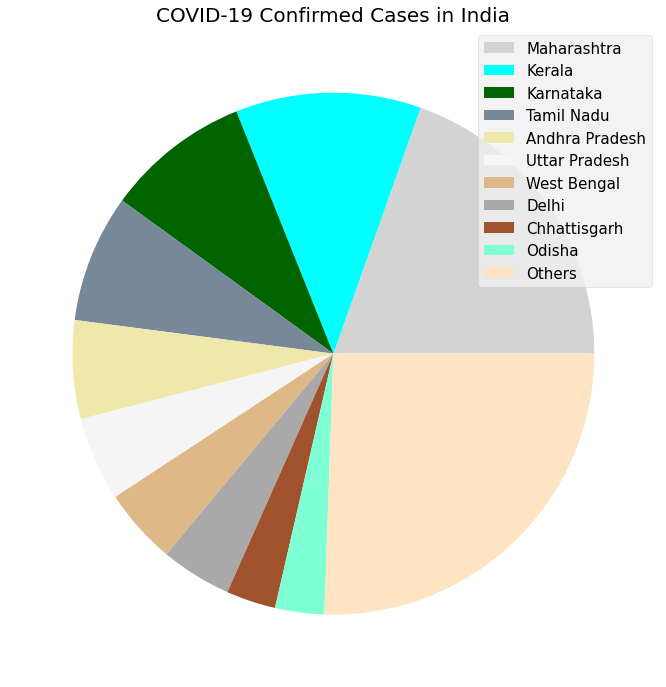

In [29]:
plot_pie_country_with_regions('India', 'COVID-19 Confirmed Cases in India')

In [30]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

In [31]:
days_in_future = 20 # Prediction for next 'n' days (in this case, n = 20 days)
future_forecast = np.array([i for i in range(len(dates) + days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forecast[:-20]

In [32]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

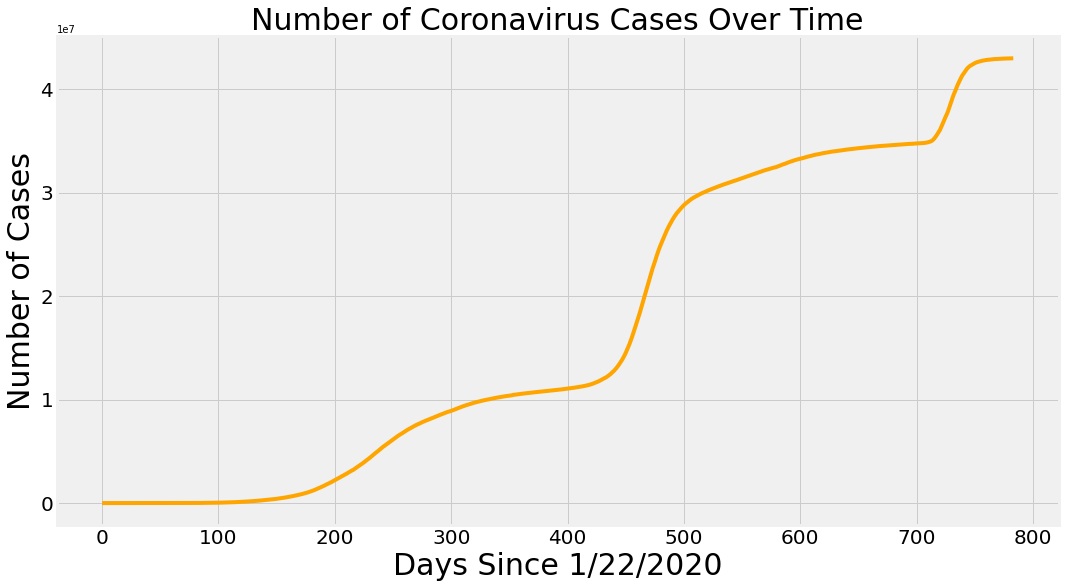

In [33]:
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, india_cases, color="orange")
plt.title('Number of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

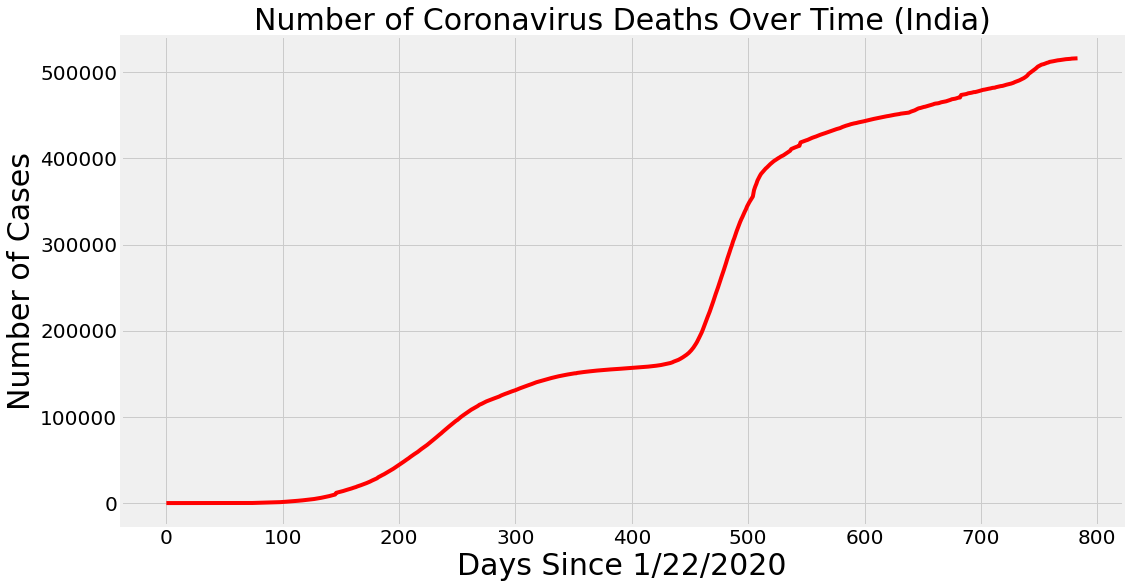

In [34]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, india_deaths, color="red")
plt.title('Number of Coronavirus Deaths Over Time (India)', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

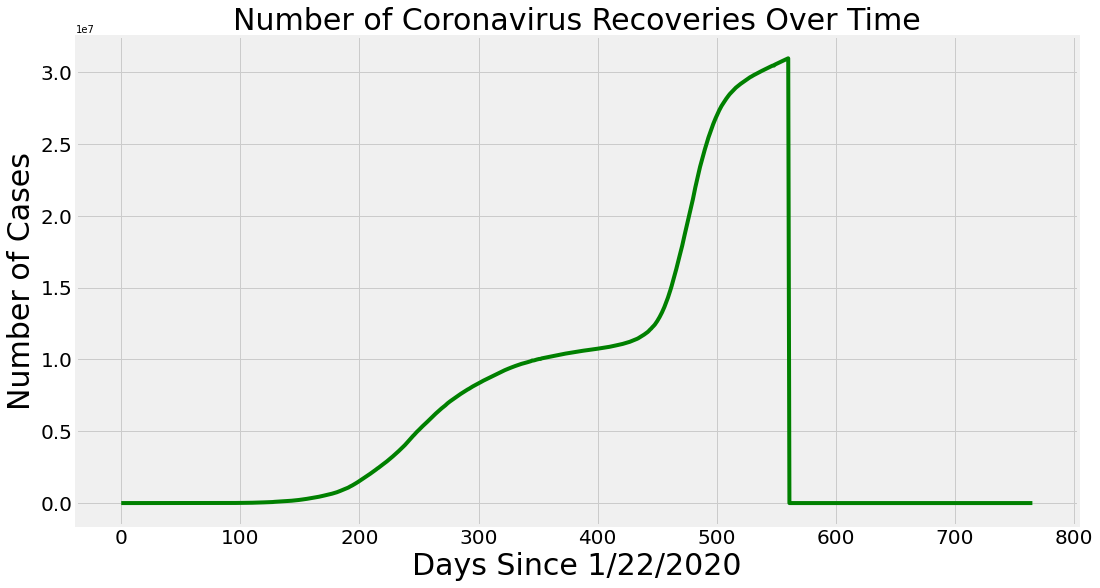

In [35]:
plt.figure(figsize=(16, 9))
re = india_recoveries
plt.plot(adjusted_dates[:-18], india_recoveries[:-18], color="green")
plt.title('Number of Coronavirus Recoveries Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

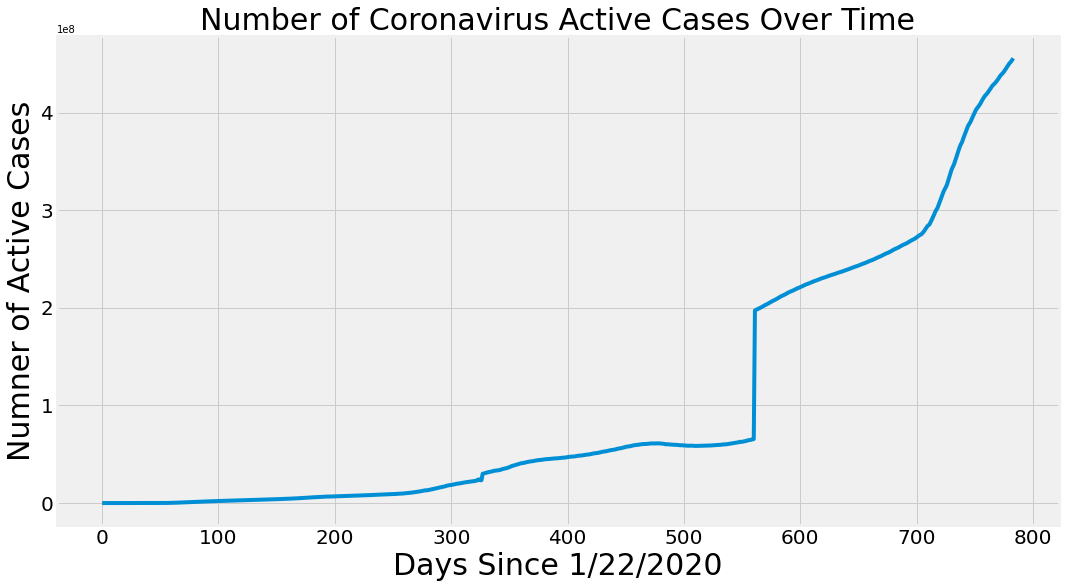

In [36]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_active)
plt.title('Number of Coronavirus Active Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Numner of Active Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

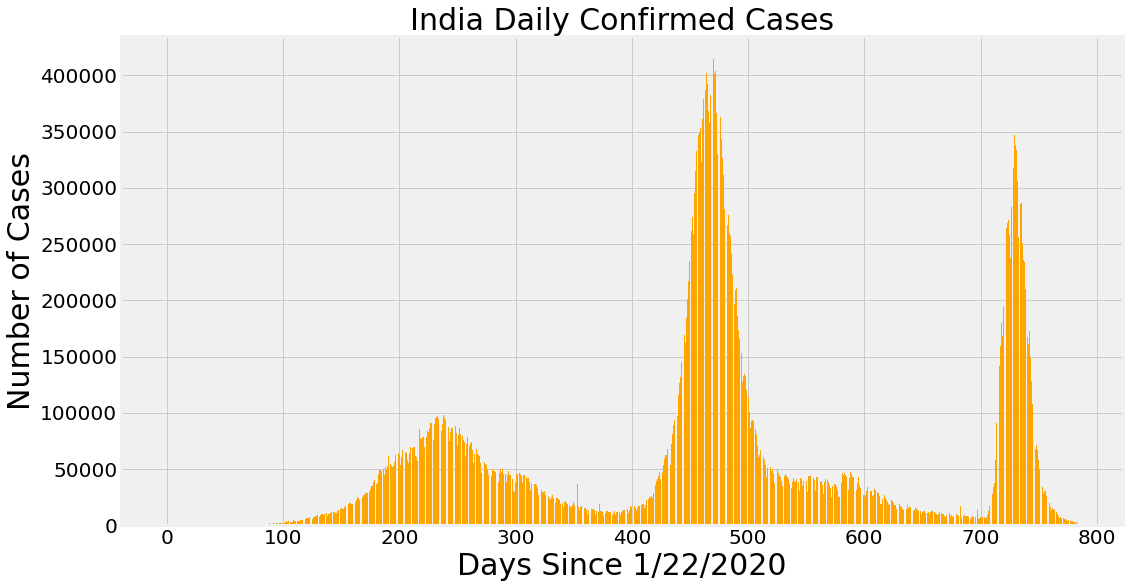

In [37]:
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, india_daily_increase, color='orange')
plt.title('India Daily Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

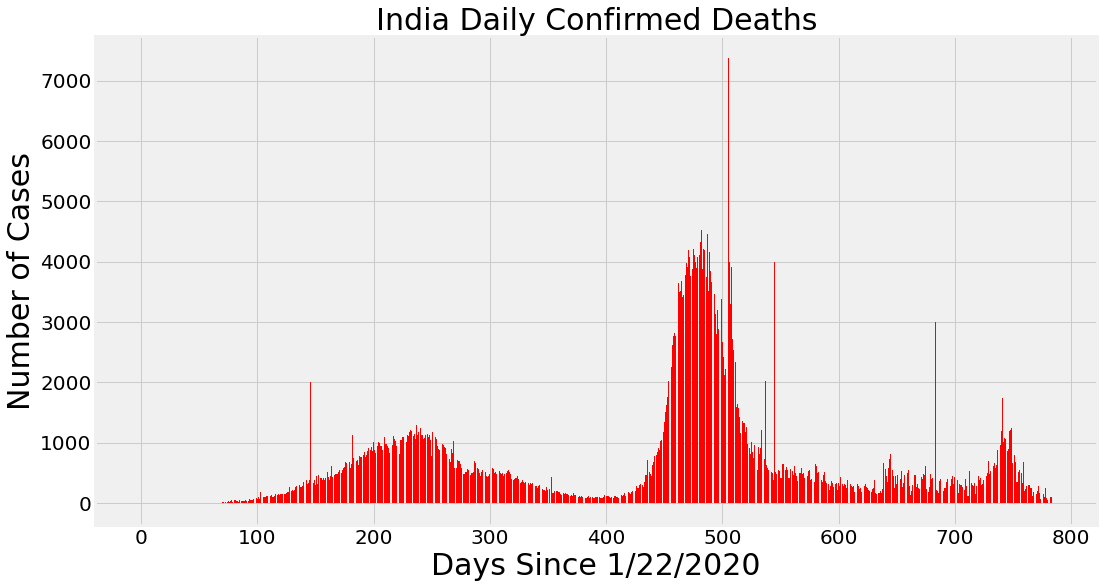

In [38]:
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, india_daily_death, color='red')
plt.title('India Daily Confirmed Deaths', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

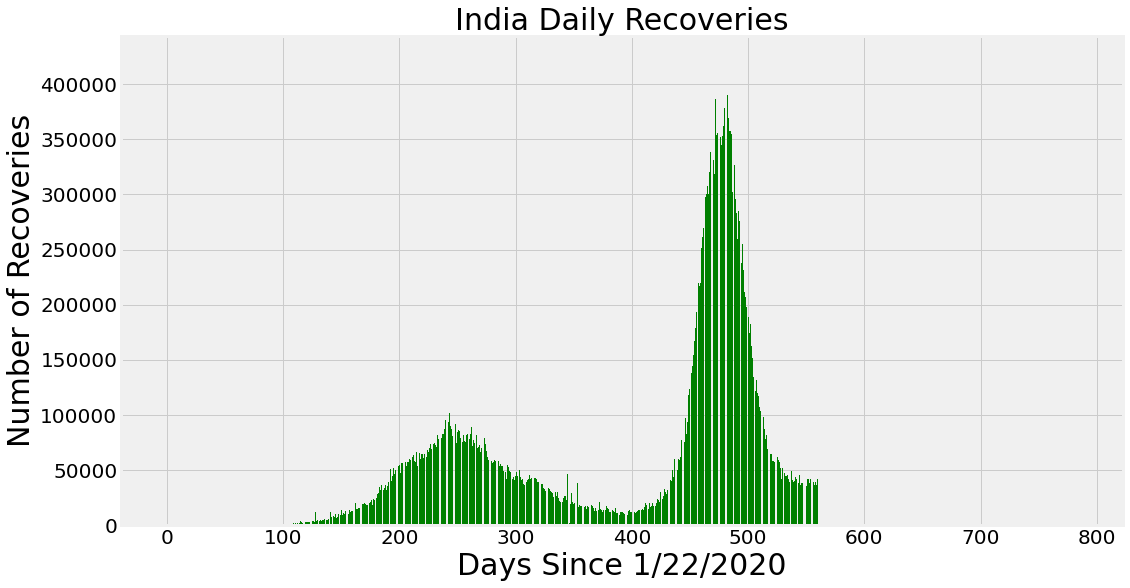

In [39]:
india_daily_recoveries = []
for i in india_daily_recovery:
    if abs(i) == 30974748:
        i = 0
    india_daily_recoveries.append(abs(i))
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, india_daily_recoveries, color='green')
plt.title('India Daily Recoveries', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Recoveries', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

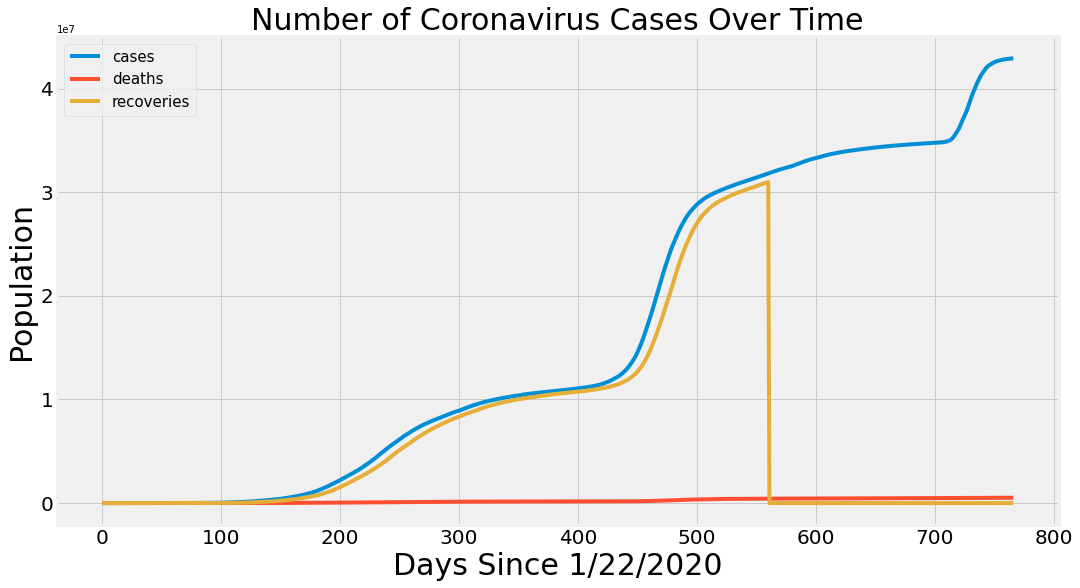

In [40]:
# All-in-one Graph
unverified_data = -17
plt.figure(figsize=(16, 9))
plt.plot(india_cases[:unverified_data], label="cases")
plt.plot(india_deaths[:unverified_data], label="deaths")
plt.plot(india_recoveries[:unverified_data], label="recoveries")
plt.title('Number of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Population', size=30)
plt.legend(loc=2, prop={'size': 15})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [41]:
def plot_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(16, 9))
    plt.plot(x, y)
    plt.plot(future_forecast, pred, linestyle='dashed', color=color)
    plt.title('Number of Coronavirus Cases Over Time', size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.legend(['Confirmed Cases', algo_name], prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

# Machine Learning Models

In [42]:
# Importing libraries for Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Polynomial Regression on Indian Cases

In [43]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.25, shuffle=False) 

In [44]:
# transform data for polynomial regression
poly = PolynomialFeatures(degree=3)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forecast = poly.fit_transform(future_forecast)

In [45]:
# polynomial regression
linear_model = LinearRegression(normalize=True, fit_intercept=True)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forecast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 40213975.274979465
MSE: 4802094546554469.0


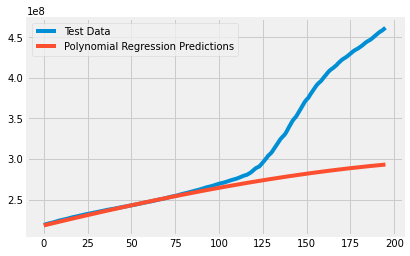

In [46]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

## RandomizedSearchCV on Polynomial Regression for Indian Cases

In [47]:
predicted_cases = []
for i in range(len(linear_pred)):
    predicted_cases.append(list(linear_pred[i]))

In [48]:
prediction = []
for i in range(len(predicted_cases)):
    cases = predicted_cases[i]
    cases = cases[0]
    prediction.append(cases)

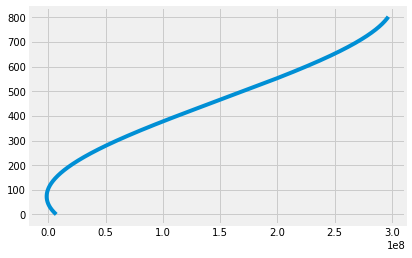

In [49]:
plt.plot(prediction, range(len(prediction)))
plt.show()

In [50]:
len(prediction)

804